In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/uk/Downloads/JOB DESCRIPTION /porter_delivery_analysis/data/processed/porter_cleaned.csv")

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['hour'] = df['created_at'].dt.hour
features = ['hour', 'market_id', 'total_items', 'total_onshift_partners', 'total_busy_partners']
X = pd.get_dummies(df[features].fillna(0), drop_first=True)
y = df['delivery_duration_minute']

In [5]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# The model achieved a Mean Squared Error of 305.60, indicating an average prediction error of approximately 17.48 minutes for delivery duration.

Mean Squared Error: 305.60


In [8]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head())

# The feature importance analysis reveals that total_onshift_partners and total_busy_partners are the most influential factors in predicting delivery duration,followed by hour,total_items,and market_id.

                  feature  importance
3  total_onshift_partners    0.303112
4     total_busy_partners    0.297628
0                    hour    0.164471
2             total_items    0.153981
1               market_id    0.080808


In [9]:
feature_importance = pd.DataFrame({
    'feature': ['total_onshift_partners', 'total_busy_partners', 'hour', 'total_items', 'market_id'],
    'importance': [0.303112, 0.297628, 0.164471, 0.153981, 0.080808]
})

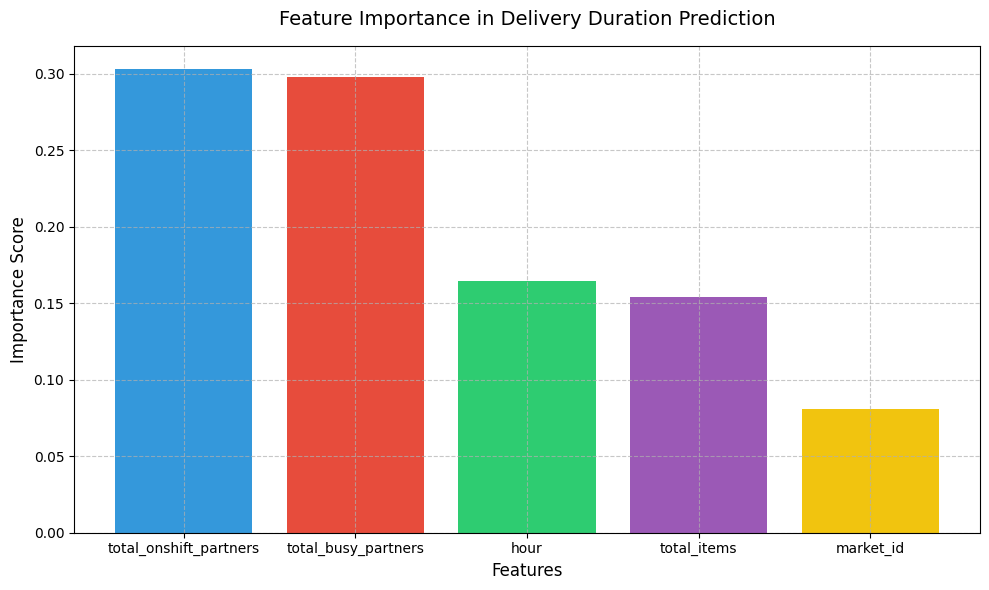

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'], color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f1c40f'])
plt.title('Feature Importance in Delivery Duration Prediction', fontsize=14, pad=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# The bar chart highlights that total_onshift_partners (0.30) and total_busy_partners (0.30) are the most significant factors in predicting delivery duration,
# followed by hour (0.16), total_items (0.15), and market_id (0.08).